In [128]:
import numpy as np
import pandas as pd

In [87]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [88]:
# df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

df = pd.read_csv("Churn_Modelling.csv")

In [89]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [90]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [91]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [92]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [93]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [94]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [95]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [96]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [97]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [100]:
!pip install tensorflow

In [101]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [102]:
model_1 = Sequential()

model_1.add(Dense(3,activation='sigmoid',input_dim=11))
model_1.add(Dense(1,activation='sigmoid'))


In [103]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 3)                 36        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
model_1.compile(optimizer='Adam',loss='binary_crossentropy')

In [105]:
model_1.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5599
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5033
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4756
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4607
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4510
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4440
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4389
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4351
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4323
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4302


In [106]:
model_1.layers[0].get_weights()

[array([[ 0.02209467,  0.22589822,  0.056283  ],
        [-1.0229896 , -2.2927916 , -1.5113229 ],
        [ 0.25278345,  0.10473549, -0.14164294],
        [-0.58537674,  0.1817432 , -0.39889622],
        [ 0.02914235,  0.2744644 ,  0.06057534],
        [-0.09755526,  0.07987995,  0.0726125 ],
        [ 0.90239483,  0.2564642 ,  0.58890736],
        [ 0.08588465, -0.19314161, -0.08654418],
        [-0.30877525, -0.5450427 , -0.9695297 ],
        [ 0.16631752,  0.05793216, -0.47111   ],
        [ 0.37123325,  0.5960548 ,  0.49906337]], dtype=float32),
 array([0.21320868, 0.22727334, 0.20228459], dtype=float32)]

In [107]:
model_1.layers[1].get_weights()

[array([[-1.3764238 ],
        [-0.84451365],
        [-0.683502  ]], dtype=float32),
 array([-0.04561212], dtype=float32)]

In [108]:
y_log_1 = model_1.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [109]:
y_log_1

array([[0.22592016],
       [0.33174637],
       [0.16968834],
       ...,
       [0.18040396],
       [0.1296949 ],
       [0.18868545]], dtype=float32)

In [110]:
y_pred_1 = np.where(y_log_1>0.5, 1, 0)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_1)

0.7975

In [112]:
model_2 = Sequential()

model_2.add(Dense(11,activation='relu',input_dim=11))
model_2.add(Dense(11,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))


In [113]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
model_2.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
history = model_2.fit(X_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5701 - accuracy: 0.7423 - val_loss: 0.4963 - val_accuracy: 0.8037
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4547 - accuracy: 0.8100 - val_loss: 0.4519 - val_accuracy: 0.8106
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8195 - val_loss: 0.4341 - val_accuracy: 0.8144
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8258 - val_loss: 0.4195 - val_accuracy: 0.8256
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3977 - accuracy: 0.8330 - val_loss: 0.4054 - val_accuracy: 0.8250
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3855 - accuracy: 0.8417 - val_loss: 0.3942 - val_accuracy: 0.8325
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3741 - accuracy: 0.8464 - val_loss: 0.3817 - val_accuracy: 0.8388

In [117]:
history.history

{'loss': [0.5701203346252441,
  0.4547494947910309,
  0.4259727895259857,
  0.41099539399147034,
  0.3977229595184326,
  0.3855048716068268,
  0.37412166595458984,
  0.3639838397502899,
  0.3554295301437378,
  0.3496891260147095,
  0.34609565138816833,
  0.343323290348053,
  0.3408454954624176,
  0.33896294236183167,
  0.3380052447319031,
  0.33636021614074707,
  0.33586224913597107,
  0.334458589553833,
  0.3343128263950348,
  0.3336493968963623,
  0.3328281044960022,
  0.33185291290283203,
  0.3313034176826477,
  0.330972820520401,
  0.33044567704200745,
  0.32933151721954346,
  0.3289773166179657,
  0.3282630145549774,
  0.32811224460601807,
  0.32718440890312195,
  0.32689371705055237,
  0.3267248272895813,
  0.32663071155548096,
  0.3258465826511383,
  0.32472172379493713,
  0.3249080181121826,
  0.32469627261161804,
  0.32444262504577637,
  0.32404568791389465,
  0.3237248659133911,
  0.32396790385246277,
  0.32316797971725464,
  0.3230353593826294,
  0.3234756588935852,
  0.3228

In [118]:
model_2.layers[0].get_weights()

[array([[ 0.04390776, -0.06930531,  0.05990038, -0.05298251,  0.08674425,
         -0.03910659, -0.10099526, -0.07540377, -0.21816176, -0.22538525,
         -0.5084701 ],
        [-0.7030411 ,  0.19300401,  0.12833151,  0.5211673 , -0.66774064,
          0.397971  ,  0.8926127 ,  0.641058  , -0.36267474, -0.09841822,
          0.35724118],
        [-0.1282047 , -0.02993901,  0.04128409,  0.15987225,  0.14131282,
         -0.30118722, -0.11509541, -0.1666782 , -0.20920844, -0.05340421,
         -0.8513895 ],
        [-0.0446641 , -0.8456752 , -0.9531823 , -0.03859781, -0.4576953 ,
         -0.06040123, -0.11760399,  0.3546104 , -0.04008475, -0.48671463,
          0.3592635 ],
        [-0.13267677,  0.29642928, -0.8769123 , -0.43238667,  0.27435634,
          1.3075637 ,  1.1524533 , -0.4074128 ,  0.97831136,  0.28212562,
         -0.23930687],
        [-0.16132635,  0.07835701, -0.15505949, -0.38654542, -0.25079682,
          0.19265276, -0.0897895 , -0.19241527, -0.31428775, -0.0622415

In [119]:
model_2.layers[1].get_weights()

[array([[ 1.45868454e-02, -1.33557692e-01, -8.13413680e-01,
          4.99442637e-01, -1.14517190e-01, -5.81048250e-01,
         -5.43178856e-01, -6.54486492e-02,  5.41936934e-01,
          4.28071879e-02, -2.43837938e-01],
        [ 3.09277415e-01,  3.49536508e-01, -3.69207025e-01,
         -3.54915977e-01,  6.88990891e-01, -1.26989856e-01,
         -4.89446148e-02,  4.87302214e-01, -9.27394703e-02,
          4.14432645e-01,  2.45675296e-01],
        [-5.32325387e-01,  7.10113049e-01, -9.10226524e-01,
          1.36358142e-01,  1.37831882e-01,  3.69890690e-01,
          1.77162111e-01, -4.18887585e-01,  1.50159478e-01,
          7.56592676e-02, -1.39178902e-01],
        [ 5.46667576e-01,  1.00767232e-01, -1.02521554e-01,
          2.73281842e-01,  4.46120828e-01,  3.05000722e-01,
         -5.24282046e-02,  4.35342103e-01, -3.08297843e-01,
         -2.17631030e+00, -2.50597060e-01],
        [ 4.19080675e-01, -5.57802856e-01, -1.47478387e-01,
         -2.86487490e-01,  3.83073986e-02, -

In [120]:
model_2.layers[2].get_weights()

[array([[-0.41160864],
        [ 1.1061046 ],
        [ 1.3249929 ],
        [-0.6373849 ],
        [-0.6166416 ],
        [ 0.76590294],
        [ 1.2782853 ],
        [-0.34682482],
        [-0.4885872 ],
        [ 1.5489388 ],
        [-1.470275  ]], dtype=float32),
 array([-0.16567901], dtype=float32)]

In [121]:
y_log_2 = model_2.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [122]:
y_log_2

array([[0.16360347],
       [0.27608436],
       [0.10805916],
       ...,
       [0.10927182],
       [0.09861027],
       [0.06587583]], dtype=float32)

In [123]:
y_pred_2 = np.where(y_log_2>0.5, 1, 0)

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_2)

0.863

In [125]:
import matplotlib.pyplot as plt

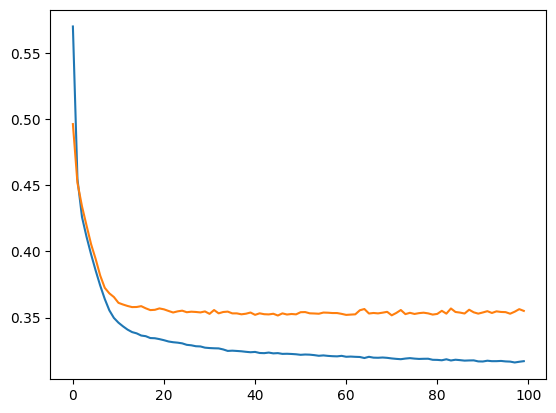

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

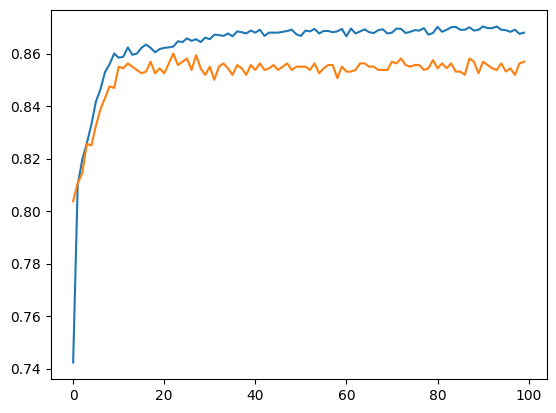

In [127]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])